In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA, KernelPCA
from sklearn.manifold import Isomap, LocallyLinearEmbedding
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import silhouette_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn_extra.cluster import KMedoids
from sklearn.neighbors import KernelDensity

In [2]:
train_df = pd.read_csv('train.csv')
valid_df = pd.read_csv('valid.csv')
test_df = pd.read_csv('test.csv')

In [23]:
train_df.head(5)

,Brightness,Contrast,Mean,Variance,Skewness,Kurtosis,Entropy,Energy,Absolute Moment k=1,Absolute Moment k=2,...,Information Measure I,Information Measure II,Maximal Correlation Coefficient,Short-run Emphasis,Long-run Emphasis,Gray-level Nonuniformity,Difference of Entropy,Second Largest Eigenvalue,Label,Image
0,146.146736,81.409801,146.146736,6627.555637,-0.186254,-1.798750,6.974621,0.011098,146.146736,117.858576,...,1.0,0.0,0.010016,1.0,0.0,0.000006,4.469887,0.015243,Hibiscus,IMG_20241029_131633_jpg.rf.a3f2d7fa633ae0536e8...
1,147.130032,67.900449,147.130032,4610.471012,-0.399389,-1.412432,7.179110,0.010070,147.130032,117.151824,...,1.0,0.0,0.014951,1.0,0.0,0.000007,4.732864,0.020229,Hibiscus,IMG_20241029_131640_jpg.rf.30a12f9b36a51bb91c4...
2,148.789408,73.502056,148.789408,5402.552291,-0.262159,-1.708594,6.882111,0.011922,148.789408,114.736928,...,1.0,0.0,0.012129,1.0,0.0,0.000007,3.966379,0.018935,Hibiscus,IMG_20241029_131646_jpg.rf.c743c72ae1c3b403d16...
3,131.630976,76.952406,131.630976,5921.672749,-0.136606,-1.796559,6.932319,0.010645,131.630976,116.349472,...,1.0,0.0,0.008145,1.0,0.0,0.000005,4.478143,0.012706,Hibiscus,IMG_20241029_131651_jpg.rf.203f579e95e3f696a72...
4,150.084368,60.223102,150.084368,3626.821986,-0.411602,-1.391630,6.861676,0.013588,150.084368,116.505328,...,1.0,0.0,0.017838,1.0,0.0,0.000009,4.438945,0.019402,Hibiscus,IMG_20241029_131711_jpg.rf.c3aee7f34bec54a8830...


In [5]:
X_train = train_df.drop(columns=['Image', 'Label'])
y_train = train_df['Label']
X_valid = valid_df.drop(columns=['Image', 'Label'])
y_valid = valid_df['Label']
X_test = test_df.drop(columns=['Image', 'Label'])

In [6]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)
X_test_scaled = scaler.transform(X_test)

In [24]:
dim_reduction_methods = {
    "PCA": PCA(n_components=15),  # Adjust components as necessary
    "Isomap": Isomap(n_components=15),
    "Kernel PCA": KernelPCA(n_components=15, kernel='rbf'),
    "LLE": LocallyLinearEmbedding(n_components=15)
}

In [25]:
def evaluate_classifiers(X_train_reduced, X_valid_reduced, y_train, y_valid):
    classifiers = {
        "SVM": SVC(),
        "KNN": KNeighborsClassifier(),
        "Random Forest": RandomForestClassifier(),
    }

    for name, clf in classifiers.items():
        clf.fit(X_train_reduced, y_train)
        y_pred = clf.predict(X_valid_reduced)
        print(f"\n{name} Results: -------------------------------------")
        print(confusion_matrix(y_valid, y_pred))
        print(classification_report(y_valid, y_pred))

## Dimensionality Reduction and Evaluation

In [26]:
for name, method in dim_reduction_methods.items():
    print(f"\nApplying {name}...")
    X_train_reduced = method.fit_transform(X_train_scaled)
    X_valid_reduced = method.transform(X_valid_scaled)
    
    evaluate_classifiers(X_train_reduced, X_valid_reduced, y_train, y_valid)


Applying PCA...

SVM Results: -------------------------------------
[[ 0  1  0  0  1  0  0  0  0  0]
 [ 0  1  0  0  0  0  0  0  8  0]
 [ 0  0  3  0  0  0  0  0  1  1]
 [ 0  1  0  0  0  0  0  0  1  0]
 [ 0  0  0  0  4  0  0  0  0  0]
 [ 0  0  0  0  1  2  0  0  0  0]
 [ 1  0  0  0  3  0  2  0  2  0]
 [ 0  0  0  0  0  1  0  2  0  0]
 [ 0  0  0  0  0  0  0  0 60  1]
 [ 0  0  5  0  0  1  0  0  1  0]]
              precision    recall  f1-score   support

      Ajwain       0.00      0.00      0.00         2
      Almond       0.33      0.11      0.17         9
      Ashoka       0.38      0.60      0.46         5
   DrumStick       0.00      0.00      0.00         2
    Fittonia       0.44      1.00      0.62         4
    Hibiscus       0.50      0.67      0.57         3
   JackFruit       1.00      0.25      0.40         8
       Mango       1.00      0.67      0.80         3
        Neem       0.82      0.98      0.90        61
     Parijat       0.00      0.00      0.00         7

    

e:\!VNIT College\A. Pattern Recognition\Leaf\venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
e:\!VNIT College\A. Pattern Recognition\Leaf\venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
e:\!VNIT College\A. Pattern Recognition\Leaf\venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metr


Random Forest Results: -------------------------------------
[[ 1  0  0  0  0  1  0  0  0  0]
 [ 0  2  0  0  0  0  0  0  7  0]
 [ 1  0  3  0  0  0  0  0  1  0]
 [ 0  1  0  0  0  0  0  0  1  0]
 [ 0  0  0  0  3  0  0  0  1  0]
 [ 0  0  0  0  1  2  0  0  0  0]
 [ 0  0  0  0  2  0  3  2  1  0]
 [ 0  0  0  0  1  1  0  1  0  0]
 [ 0  0  0  0  0  0  0  2 59  0]
 [ 0  0  3  0  0  0  0  0  0  4]]
              precision    recall  f1-score   support

      Ajwain       0.50      0.50      0.50         2
      Almond       0.67      0.22      0.33         9
      Ashoka       0.50      0.60      0.55         5
   DrumStick       0.00      0.00      0.00         2
    Fittonia       0.43      0.75      0.55         4
    Hibiscus       0.50      0.67      0.57         3
   JackFruit       1.00      0.38      0.55         8
       Mango       0.20      0.33      0.25         3
        Neem       0.84      0.97      0.90        61
     Parijat       1.00      0.57      0.73         7

    accurac

e:\!VNIT College\A. Pattern Recognition\Leaf\venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
e:\!VNIT College\A. Pattern Recognition\Leaf\venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
e:\!VNIT College\A. Pattern Recognition\Leaf\venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metr

[[ 2  0  0  0  0  0  0  0  0  0]
 [ 2  1  0  0  0  0  0  0  6  0]
 [ 1  0  2  0  0  0  0  1  1  0]
 [ 0  0  0  0  0  1  0  0  1  0]
 [ 1  0  0  0  3  0  0  0  0  0]
 [ 0  0  0  0  1  2  0  0  0  0]
 [ 1  2  0  0  2  0  2  0  1  0]
 [ 0  0  2  0  0  0  0  1  0  0]
 [ 2  3  0  0  0  2  0  2 52  0]
 [ 1  0  3  0  0  1  0  0  1  1]]
              precision    recall  f1-score   support

      Ajwain       0.20      1.00      0.33         2
      Almond       0.17      0.11      0.13         9
      Ashoka       0.29      0.40      0.33         5
   DrumStick       0.00      0.00      0.00         2
    Fittonia       0.50      0.75      0.60         4
    Hibiscus       0.33      0.67      0.44         3
   JackFruit       1.00      0.25      0.40         8
       Mango       0.25      0.33      0.29         3
        Neem       0.84      0.85      0.85        61
     Parijat       1.00      0.14      0.25         7

    accuracy                           0.63       104
   macro avg       

e:\!VNIT College\A. Pattern Recognition\Leaf\venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
e:\!VNIT College\A. Pattern Recognition\Leaf\venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
e:\!VNIT College\A. Pattern Recognition\Leaf\venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metr


Random Forest Results: -------------------------------------
[[ 0  1  0  0  1  0  0  0  0  0]
 [ 1  1  0  0  0  0  0  0  7  0]
 [ 1  0  3  0  0  0  0  0  1  0]
 [ 0  0  0  0  0  1  0  0  1  0]
 [ 0  0  0  0  4  0  0  0  0  0]
 [ 0  0  0  0  1  1  0  1  0  0]
 [ 0  1  0  0  3  0  3  0  1  0]
 [ 0  0  0  1  0  0  0  2  0  0]
 [ 0  0  0  0  2  0  0  2 57  0]
 [ 0  0  2  0  0  1  0  0  1  3]]
              precision    recall  f1-score   support

      Ajwain       0.00      0.00      0.00         2
      Almond       0.33      0.11      0.17         9
      Ashoka       0.60      0.60      0.60         5
   DrumStick       0.00      0.00      0.00         2
    Fittonia       0.36      1.00      0.53         4
    Hibiscus       0.33      0.33      0.33         3
   JackFruit       1.00      0.38      0.55         8
       Mango       0.40      0.67      0.50         3
        Neem       0.84      0.93      0.88        61
     Parijat       1.00      0.43      0.60         7

    accurac

e:\!VNIT College\A. Pattern Recognition\Leaf\venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
e:\!VNIT College\A. Pattern Recognition\Leaf\venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
e:\!VNIT College\A. Pattern Recognition\Leaf\venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metr


Random Forest Results: -------------------------------------
[[ 0  0  0  0  2  0  0  0  0  0]
 [ 2  1  0  0  0  0  0  0  6  0]
 [ 1  0  3  0  0  0  0  0  1  0]
 [ 0  1  0  0  0  0  0  0  1  0]
 [ 0  0  0  0  3  0  0  0  1  0]
 [ 0  0  0  0  1  2  0  0  0  0]
 [ 1  1  0  0  1  0  2  1  2  0]
 [ 0  0  1  0  0  0  0  2  0  0]
 [ 1  0  0  0  0  0  0  1 59  0]
 [ 0  0  1  0  0  1  0  0  2  3]]
              precision    recall  f1-score   support

      Ajwain       0.00      0.00      0.00         2
      Almond       0.33      0.11      0.17         9
      Ashoka       0.60      0.60      0.60         5
   DrumStick       0.00      0.00      0.00         2
    Fittonia       0.43      0.75      0.55         4
    Hibiscus       0.67      0.67      0.67         3
   JackFruit       1.00      0.25      0.40         8
       Mango       0.50      0.67      0.57         3
        Neem       0.82      0.97      0.89        61
     Parijat       1.00      0.43      0.60         7

    accurac

e:\!VNIT College\A. Pattern Recognition\Leaf\venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
e:\!VNIT College\A. Pattern Recognition\Leaf\venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
e:\!VNIT College\A. Pattern Recognition\Leaf\venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metr

              precision    recall  f1-score   support

      Ajwain       0.00      0.00      0.00         2
      Almond       0.30      0.33      0.32         9
      Ashoka       0.12      0.20      0.15         5
   DrumStick       0.00      0.00      0.00         2
    Fittonia       0.33      0.50      0.40         4
    Hibiscus       0.50      0.67      0.57         3
   JackFruit       1.00      0.25      0.40         8
       Mango       0.14      0.33      0.20         3
        Neem       0.85      0.87      0.86        61
     Parijat       1.00      0.14      0.25         7

    accuracy                           0.62       104
   macro avg       0.43      0.33      0.32       104
weighted avg       0.71      0.62      0.63       104


Random Forest Results: -------------------------------------
[[ 0  1  0  0  0  0  0  1  0  0]
 [ 1  0  0  0  2  1  0  0  5  0]
 [ 0  0  2  0  1  0  0  0  1  1]
 [ 0  1  0  0  0  0  0  0  1  0]
 [ 0  1  0  0  1  0  0  2  0  0]
 [ 0  0  0  0 

e:\!VNIT College\A. Pattern Recognition\Leaf\venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
e:\!VNIT College\A. Pattern Recognition\Leaf\venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
e:\!VNIT College\A. Pattern Recognition\Leaf\venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metr

### Parzen Window (Linear Classifier)

In [13]:
def parzen_window_classifier(X_train, y_train, X_valid):
    classes = np.unique(y_train)
    densities = {}

    for c in classes:
        kde = KernelDensity(kernel='gaussian', bandwidth=0.5).fit(X_train[y_train == c])
        densities[c] = kde

    log_densities = np.array([densities[c].score_samples(X_valid) for c in classes]).T
    return classes[np.argmax(log_densities, axis=1)]

In [14]:
def evaluate_parzen(X_train, y_train, X_valid, y_valid):
    y_pred_parzen = parzen_window_classifier(X_train, y_train, X_valid)
    print("Parzen Window Classifier Results:")
    print(confusion_matrix(y_valid, y_pred_parzen))
    print(classification_report(y_valid, y_pred_parzen))

In [20]:
for name, method in dim_reduction_methods.items():
    print(f"\nApplying {name} for Parzen Window...-----------------------------------")
    X_train_reduced = method.fit_transform(X_train_scaled)
    X_valid_reduced = method.transform(X_valid_scaled)
    
    evaluate_parzen(X_train_reduced, y_train, X_valid_reduced, y_valid)


Applying PCA for Parzen Window...-----------------------------------
Parzen Window Classifier Results:
[[ 0  0  0  0  1  1  0  0  0  0]
 [ 1  0  0  1  0  1  0  0  5  1]
 [ 0  0  1  0  1  1  0  1  0  1]
 [ 0  0  0  0  0  1  0  0  1  0]
 [ 0  1  0  0  1  1  0  0  0  1]
 [ 0  0  0  0  1  2  0  0  0  0]
 [ 1  2  1  0  1  0  3  0  0  0]
 [ 0  0  1  0  0  0  0  1  0  1]
 [ 7  2  4  8  0  4  0  0 36  0]
 [ 0  0  1  0  0  3  0  0  0  3]]
              precision    recall  f1-score   support

      Ajwain       0.00      0.00      0.00         2
      Almond       0.00      0.00      0.00         9
      Ashoka       0.12      0.20      0.15         5
   DrumStick       0.00      0.00      0.00         2
    Fittonia       0.20      0.25      0.22         4
    Hibiscus       0.14      0.67      0.24         3
   JackFruit       1.00      0.38      0.55         8
       Mango       0.50      0.33      0.40         3
        Neem       0.86      0.59      0.70        61
     Parijat       0.43 

e:\!VNIT College\A. Pattern Recognition\Leaf\venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
e:\!VNIT College\A. Pattern Recognition\Leaf\venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
e:\!VNIT College\A. Pattern Recognition\Leaf\venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metr

# Clustering Method

In [16]:
def evaluate_clustering(X, method_name):
    if method_name == "K-Means":
        labels = KMeans(n_clusters=10, random_state=42).fit_predict(X)
    elif method_name == "K-Medoids":
        labels = KMedoids(n_clusters=10).fit_predict(X)
    elif method_name == "DBSCAN":
        labels = DBSCAN(eps=0.5, min_samples=5).fit_predict(X)
    else:
        raise ValueError("Unknown clustering method")

    if len(set(labels)) > 1 and -1 not in labels:
        silhouette_avg = silhouette_score(X, labels)
        print(f"{method_name} Silhouette Score: {silhouette_avg}")
    else:
        print(f"{method_name} could not compute silhouette score.")

    plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', marker='o')
    plt.title(f"{method_name} Clustering")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()


Applying K-Means clustering after PCA...
K-Means Silhouette Score: 0.3475657435615913


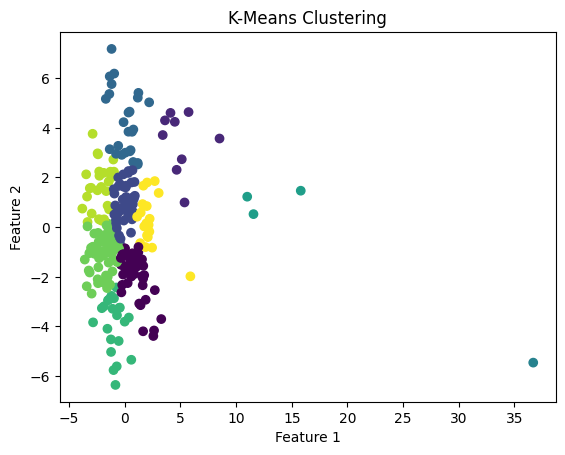


Applying K-Means clustering after Isomap...
K-Means Silhouette Score: 0.3594016289542923


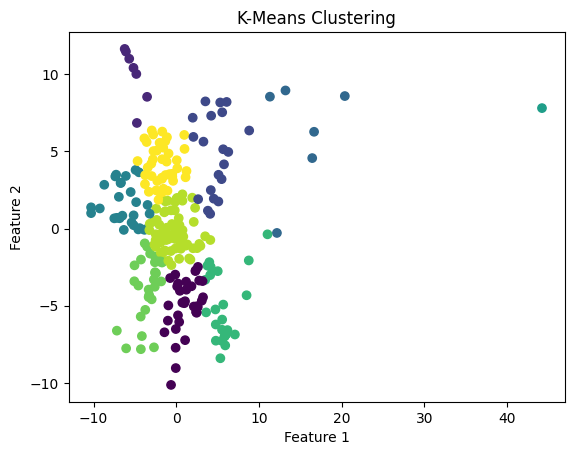


Applying K-Means clustering after KernelPCA...
K-Means Silhouette Score: 0.34898850693166034


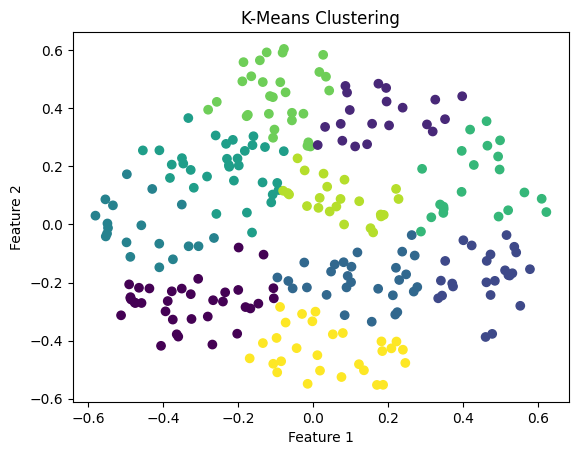


Applying K-Means clustering after LocallyLinearEmbedding...
K-Means Silhouette Score: 0.5729839960159071


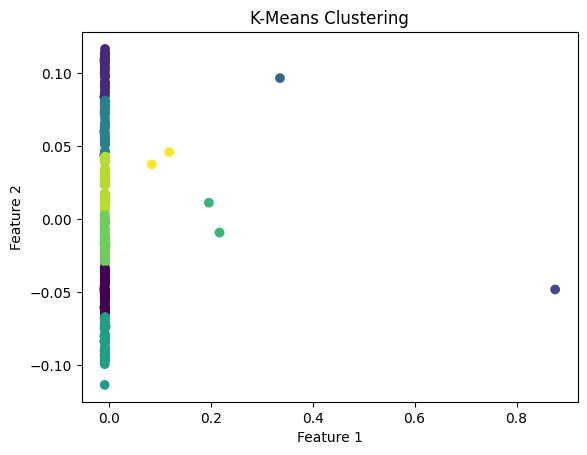


Applying K-Medoids clustering after PCA...
K-Medoids Silhouette Score: 0.17385747532256182


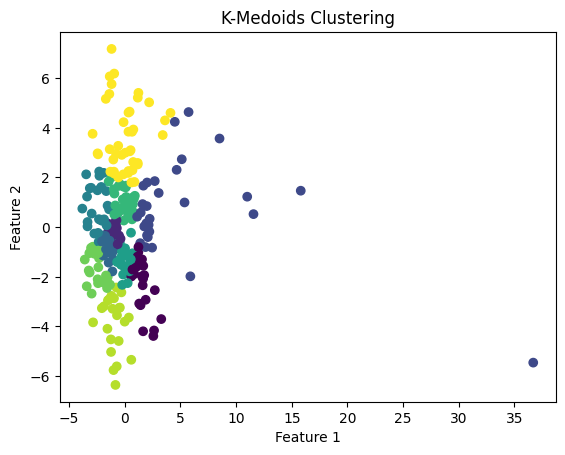


Applying K-Medoids clustering after Isomap...
K-Medoids Silhouette Score: 0.24761798041386254


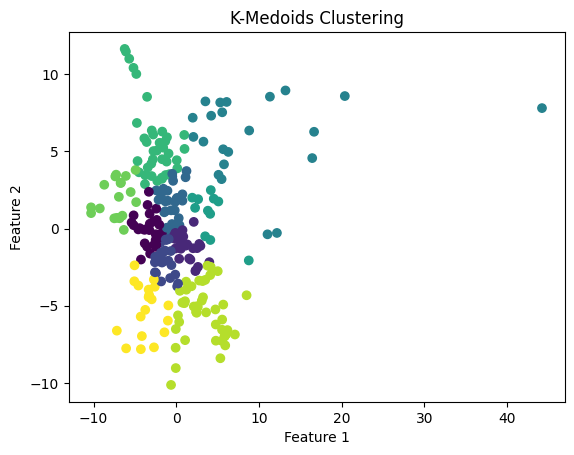


Applying K-Medoids clustering after KernelPCA...
K-Medoids Silhouette Score: 0.32798685686915613


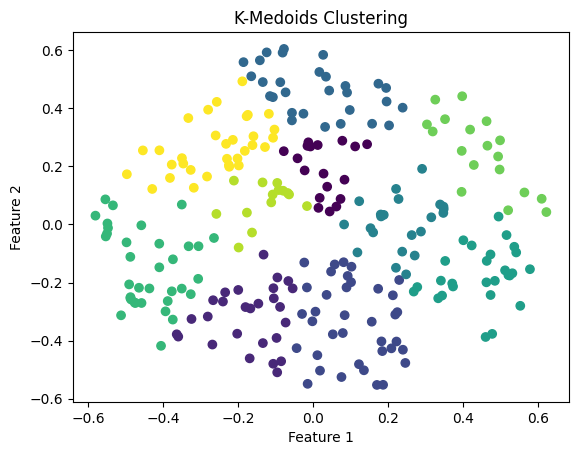


Applying K-Medoids clustering after LocallyLinearEmbedding...
K-Medoids Silhouette Score: 0.09296627787210948


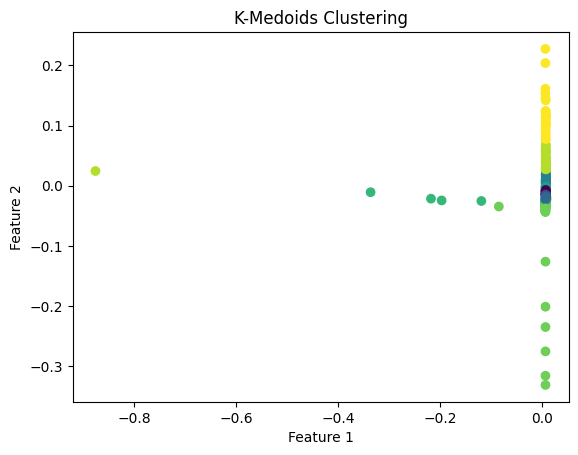


Applying DBSCAN clustering after PCA...
DBSCAN could not compute silhouette score.


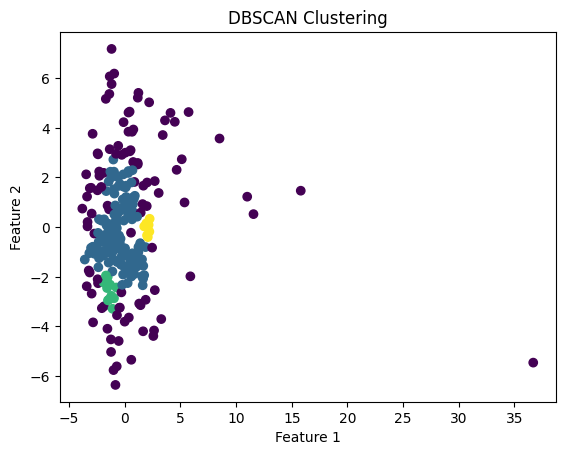


Applying DBSCAN clustering after Isomap...
DBSCAN could not compute silhouette score.


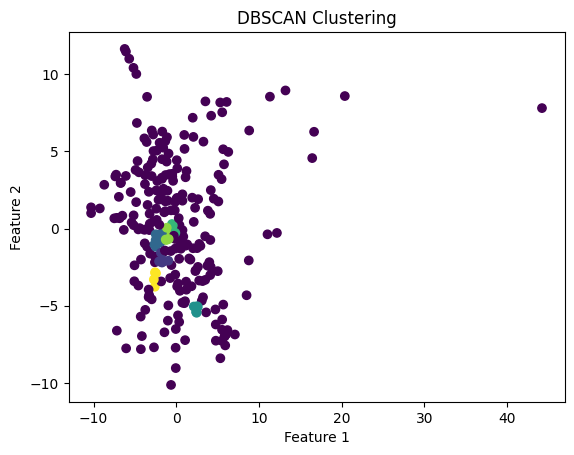


Applying DBSCAN clustering after KernelPCA...
DBSCAN could not compute silhouette score.


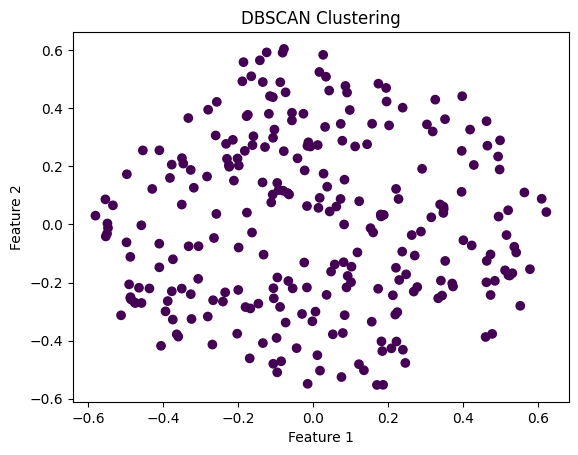


Applying DBSCAN clustering after LocallyLinearEmbedding...
DBSCAN could not compute silhouette score.


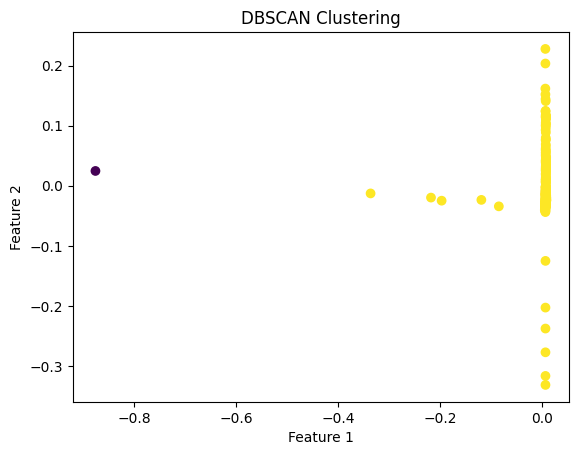

In [17]:
clustering_methods = ["K-Means", "K-Medoids", "DBSCAN"]
for name in clustering_methods:
    for method in dim_reduction_methods.values():
        print(f"\nApplying {name} clustering after {method.__class__.__name__}...")
        X_train_reduced = method.fit_transform(X_train_scaled)
        evaluate_clustering(X_train_reduced, name)